In [1]:
# IDF (Inverse Document Frequency) = total docs / Number of doucuments term t appeared (take log)
# if the frequence of a token in all document is higher then the score will be lower and vice versa

# if given a paragraph
# TF (Term Frequency) = Total NUmber of time term t is present in doc A / Total number of tiken in doc A

# TF-IDF vectorizer = TF*IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [4]:
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [5]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [6]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [7]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

# ecommerceDataset

In [8]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("ecommerceDataset.csv",header=None)
print(df.shape)
df.head(5)

(50425, 2)


,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [9]:
df[:1]

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...


In [10]:
df.columns = ['Label','Text']
df

,Label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [11]:
df['Label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Label, dtype: int64

In [12]:
df.dropna()

,Label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [13]:
df.isnull().sum()

Label    0
Text     1
dtype: int64

In [14]:
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [15]:
min_samples = 8500 # we have these many SCIENCE articles and SCIENCE is our minority class


df_Household = df[df.Label=="Household"].sample(min_samples, random_state=2)
df_Books = df[df.Label=="Books"].sample(min_samples, random_state=2)
df_Electronics = df[df.Label=="Electronics"].sample(min_samples, random_state=2)
df_ca = df[df.Label=="Clothing & Accessories"].sample(min_samples, random_state=2)

In [16]:
df = pd.concat([df_Household,df_Books,df_Electronics,df_ca],axis=0)
df.Label.value_counts()

Household                 8500
Books                     8500
Electronics               8500
Clothing & Accessories    8500
Name: Label, dtype: int64

In [17]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['Label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.sample(5)

,Label,Text,label_num
33476,Clothing & Accessories,nauti nati Girls' Skirt,3
41813,Electronics,"Netgear WNR614 N300 Wi-Fi Router (White, Not a...",2
30815,Books,Your Child's Growing Mind: Brain Development a...,1
5761,Household,"Wakefit Sleeping Pillow (Single Piece) - 27"" x...",0
32953,Clothing & Accessories,FNocks Casual Ankle Length Slim Fit Women Jean...,3


In [18]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [19]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [20]:
df.head()

,Label,Text,label_num,preprocessed_txt
1710,Household,Nilkamal 2-Door Corner Cabinet (Maroon) Size:S...,0,nilkamal 2 Door Corner Cabinet Maroon Size Sta...
10081,Household,Satyam Kraft (Pack Of 8)Hexagon Glass Jar And ...,0,Satyam Kraft Pack 8)hexagon Glass Jar Containe...
3492,Household,Fourwalls Artificial Calla Lily Plant in Melam...,0,Fourwalls Artificial Calla Lily Plant Melamine...
12105,Household,Pasabahce Carafe Blue Cover Gb.Ob.(Basic),0,Pasabahce Carafe Blue Cover Gb Ob.(Basic
321,Household,Kabeer Art 11 Pc Clay Modelling Tools Set 11 p...,0,Kabeer art 11 pc clay modelling Tools Set 11 p...


In [21]:
df.Text[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [22]:
df.preprocessed_txt[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints 8.7 x 8.7 inch set 4 Painting synthetic frame uv texture print give multi effect attract special series painting make wall beautiful give royal touch painting ready hang proud possess unique painting niche apart use modern efficient print technology print ink precision epson roland hp printer innovative hd printing technique result durable spectacular look print high lifetime print solely notch 100 ink achieve brilliant true colour high level uv resistance print retain beautiful colour year add colour style live space digitally print painting pleasure eternal bliss.so bring home elegant print lushe rich color make sheer elegance friend family.it treasure forever lucky recipient liven place intriguing painting high definition hd graphic digital print home office room'

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df.label_num
)

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (27200,)
Shape of X_test:  (6800,)


In [25]:
X_train.head()

7547     Sahal- Macrame Plant Holder/Planter Jute/Hemp-...
41041    Lenovo Tab4 10 Tablet (10.1 inch,16GB,Wi-Fi + ...
11264    BUBBLE MAGUS QQ2 Nano Skimmer The Bubble Magus...
41191    IO Crest SY-PCI40010 PCI RAID Host Controller ...
23198    The Wounded Healer ( True Story of a Child Sex...
Name: Text, dtype: object

In [26]:
y_train.value_counts()
# Divides equal proportion of train test in each categorm dur to 'Stratify'

0    6800
2    6800
1    6800
3    6800
Name: label_num, dtype: int64

In [27]:
y_test.value_counts()

1    1700
3    1700
0    1700
2    1700
Name: label_num, dtype: int64

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1700
           1       0.96      0.95      0.96      1700
           2       0.95      0.95      0.95      1700
           3       0.97      0.98      0.98      1700

    accuracy                           0.95      6800
   macro avg       0.95      0.95      0.95      6800
weighted avg       0.95      0.95      0.95      6800



In [29]:
print(type(df['Text']))

<class 'pandas.core.series.Series'>


In [30]:
X_test[:5]

27981    You Can Heal Your Life (Unabridged, Adapted fo...
33596               Qube By Fort Collins Girl's Sweatshirt
25718                     NOVICZ Skating Board Skate Board
34421    Sojanya (Since 1958) Men's Navy Blue Silk Blen...
32384    Younky Winter Body Warmer Thermals Top Pajama/...
Name: Text, dtype: object

In [31]:
y_test[:5]

27981    1
33596    3
25718    1
34421    3
32384    3
Name: label_num, dtype: int64

In [32]:
y_pred[:5]

array([1, 3, 1, 3, 3], dtype=int64)

In [33]:
# use MultinomialNB as the classifier.

In [34]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1700
           1       0.97      0.93      0.95      1700
           2       0.95      0.93      0.94      1700
           3       0.97      0.98      0.97      1700

    accuracy                           0.95      6800
   macro avg       0.95      0.95      0.95      6800
weighted avg       0.95      0.95      0.95      6800



In [35]:
# use Random Forest as the classifier.

In [36]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1609,   34,   30,   27],
       [  34, 1647,    9,   10],
       [  66,   22, 1608,    4],
       [  18,   12,    4, 1666]], dtype=int64)

Text(69.0, 0.5, 'Truth')

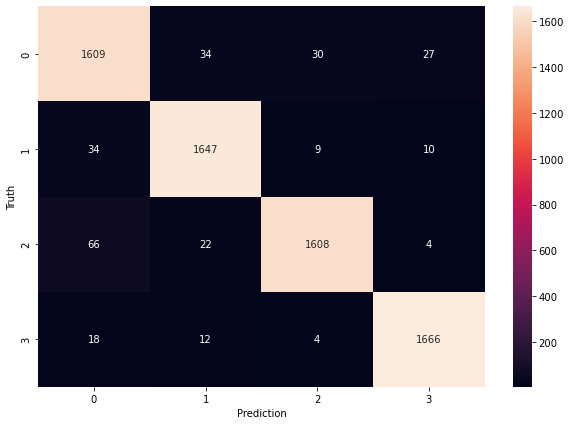

In [38]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')